<a href="https://colab.research.google.com/github/adrien-simard/AutoRegression/blob/master/TP1ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identification de modele AR

In [114]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np
import pandas as pd
import statsmodels.api as sm

Visualiser ces series et, pour chacune d'entre elles, donner la famille de modele stochastique qui lui est associée.
Ces series, sont-elles stationnaires ?


> Equations


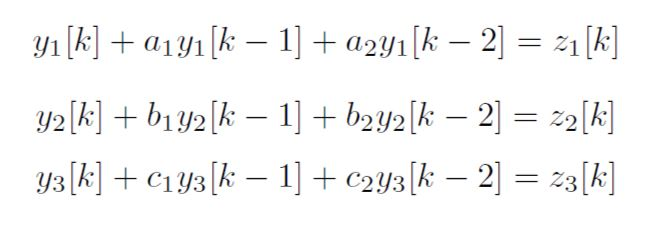

Coeficients :

In [115]:
a = [-0.0707, 0.2500]
b = [-1.6674, 0.9025]
c = [1.7820, 0.8100]
n=1536 

In [116]:
t=range(-2,n-1)

y=[k*0 for k in t]
y1 = []
y2 = []
y3 = []
for k in range(1,int(n/3)):
    y[k]=-a[0]*y[k-1]-a[1]*y[k-2]+aleas.gauss(0,1)
    y1.append(y[k])

for k in range(int(n/3)+1,2*int(n/3)):
    y[k]=-b[0]*y[k-1]-b[1]*y[k-2]+aleas.gauss(0,1)
    y2.append(y[k])

for k in range(2*int(n/3)+1,n):
    y[k]=-c[0]*y[k-1]-c[1]*y[k-2]+aleas.gauss(0,1)
    y3.append(y[k])

y=y[3:]  # suppression des donnees transitoires
t=t[3:]


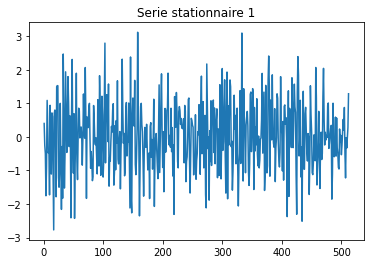

In [117]:
plt.plot(t[0:int(n/3)],y[0:int(n/3)],label='Data =series stationnaires 1')
plt.title("Serie stationnaire 1")
plt.show()

Cette serie est stionnaire car sa moyenne est constante dans le temps, de plus elle a des fluctuations qui ne change pas. Elle semble être stationnaire d'ordre 2

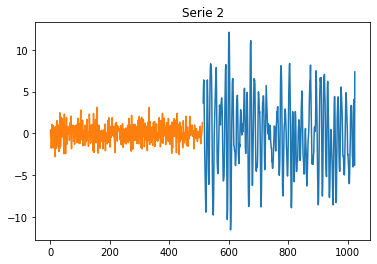

In [118]:
plt.plot(t[int(n/3)+1:2*int(n/3)],y[int(n/3)+1:2*int(n/3)],y[0:int(n/3)],label='Data =series stationnaires 1')
plt.title("Serie 2")
plt.show()

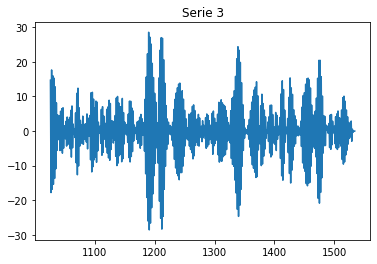

In [119]:
plt.plot(t[2*int(n/3)+1:n],y[2*int(n/3)+1:n],label='Data =series stationnaires 1')
plt.title("Serie 3")
plt.show()

Calculer et visualiser les fonctions d'autocorrelations et les spectres (densites spectrales de puissance) de
y1; y2; y3. Indiquer laquelle de ces 2 fonctions permet aisement de mettre en evidence les differences entre ces 3
processus

In [120]:
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')
    result = r/(variance*n)
    return result
y= np.array(y)
acfy = estimated_autocorrelation(y)



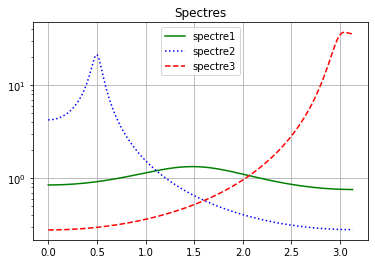

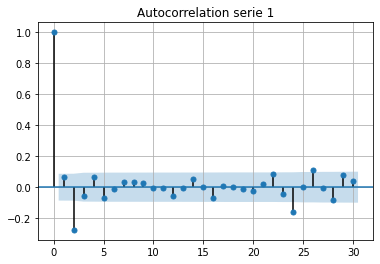

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)
 
f,mag=spectre([1]+a,[1]+b,[1]+c)
spectre1 = mag[0]
spectre2 = mag[1]
spectre3 = mag[2]
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
plt.grid() 
plt.legend(['spectre1', 'spectre2','spectre3'])
plt.title("Spectres")
plt.show()

sm.graphics.tsa.plot_acf(y[0:int(n/3)+1], lags=30)
plt.title("Autocorrelation serie 1")
plt.grid() 
plt.show()

On constate que l'autocorrélation de la serie 1 décroit directement après la première valeur. Cela s'explique car le coefficient a[0] est très proche de 0. On conclut que les données ne sont pas corrélées dans le temps. La donnée observé a un instant t ne dépends donc que des données à t-1


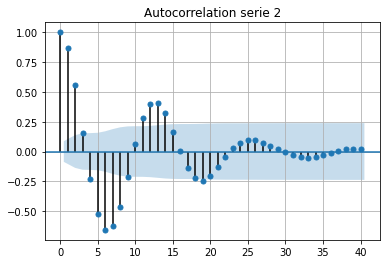

In [122]:
sm.graphics.tsa.plot_acf(y[int(n/3)+1:2*int(n/3)], lags=40)
plt.grid() 
plt.title("Autocorrelation serie 2")
plt.show()

Par contre ici on voit une plus forte corrélation, cela est logique car les coefficient c[0], c[1] sont éloignés de 0

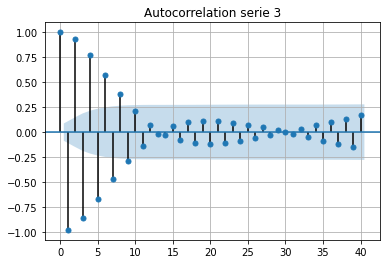

In [123]:
sm.graphics.tsa.plot_acf(y[2*int(n/3)+1:n], lags=40)
plt.grid() 
plt.title("Autocorrelation serie 3")
plt.show()

Nous avons ici aussi les données sont corrélées avec 

Creer une serie temporelle y constituee par la somme des trois processus synthetises en 1°). Visualiser cette
serie et indiquer sa nature. Calculer et visualiser la fonction d'autocorrelation et la densite spectrale de puissance
de y.

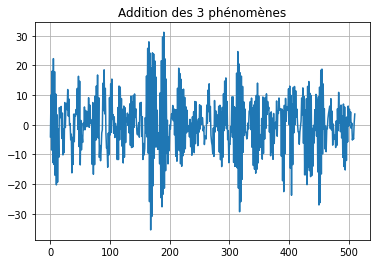

In [124]:
somme = []
for i in range(len(y1)):
  somme.append(y1[i]+y2[i]+y3[i])
plt.plot(range(len(y1)),somme[:],label='Data =somme de serie stationnaires')
plt.grid()
plt.title("Addition des 3 phénomènes")
plt.show()

La somme de 3 processus donne un processus stationnaire. On voit que la moyenne est toujours égale à 0. Cela s'explique grace à la linéarité de l'espérance. L'espérance d'une somme est la somme des espérance.

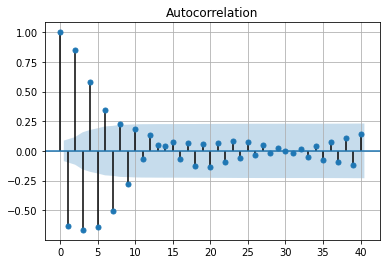

In [125]:
sm.graphics.tsa.plot_acf(somme, lags=40)
plt.grid() 
plt.title("Autocorrelation")
plt.show()

In [126]:
t=range(-2,n-1)

y=[k*0 for k in t]
y1 = []
y2 = []
y3 = []
for k in range(1,int(n/3)):
    y[k]=-a[0]*y[k-1]-a[1]*y[k-2]+aleas.gauss(0,1)
    y1.append(y[k])

for k in range(int(n/3)+1,2*int(n/3)):
    y[k]=-b[0]*y[k-1]-b[1]*y[k-2]+aleas.gauss(0,1)
    y2.append(y[k])

for k in range(2*int(n/3)+1,n):
    y[k]=-c[0]*y[k-1]-c[1]*y[k-2]+aleas.gauss(0,1)
    y3.append(y[k])

y=y[3:]  # suppression des donnees transitoires
t=t[3:]


On trace les spectres des series temporelles y1,y2,y3

In [127]:
def AR(m1,m2,nomserie,spectre2):
    D = np.cov([
	y[m1:m2] + [0, 0, 0, 0],
	[0] + y[m1:m2] + [0, 0, 0],
	[0, 0] + y[m1:m2] + [0, 0],
	[0, 0, 0] + y[m1:m2] + [0],
	[0, 0, 0, 0] + y[m1:m2]])

    E = - np.linalg.inv(D[0:2, 0:2]) @ D[0, 1:3].reshape(2, 1)  # ordre 2
    H = - np.linalg.inv(D[0:3, 0:3]) @ D[0, 1:4].reshape(3, 1)  # ordre 3
    E1 = np.append([1], E)  # vecteur de coefficients incluant a0(ordre 4)
    H1 = np.append([1], H)
    
    #tracé de la série entre 0 et m1
    plt.plot(t[m1:m2],y[m1:m2],label='Data = juxtapososition de 3 sous-series stationnaires')
    plt.title(nomserie)
    plt.show()
    # Tracé des spectres estimés
    f, mag = spectre(E1, H1)
    # Calcul des spectres des trois sous-series
    plt.semilogy(
    	f, mag[0],
    	f, mag[1],
    	':r',
        f,spectre2,':b',
        linewidth=4,
    )
    plt.title('Spectre / Calcul sur l intervalle [{} {}]'.format(m1,m2))
    plt.legend(['ordre2', 'ordre3',"vrai spectre"])
    return  plt.show()


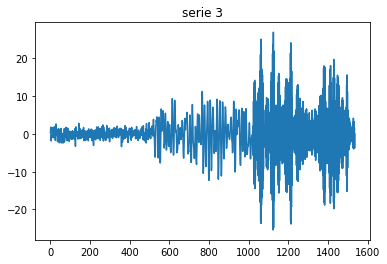

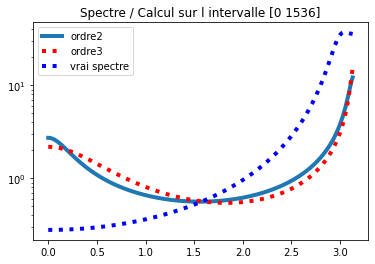

In [128]:
AR(0,n,"serie 3",spectre3)

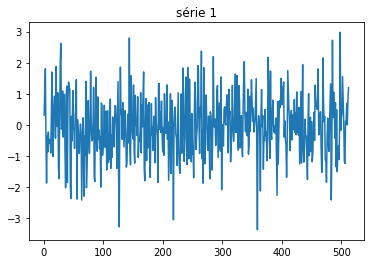

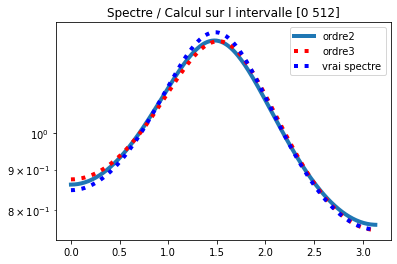

In [129]:
AR(0,int(n/3),"série 1",spectre1)

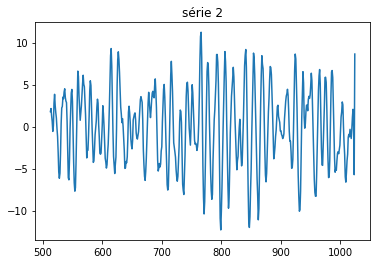

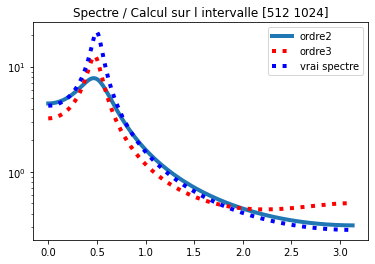

In [130]:
AR(int(n/3),2*int(n/3),"série 2",spectre2)

Spectre de la somme de y1,y2,y3

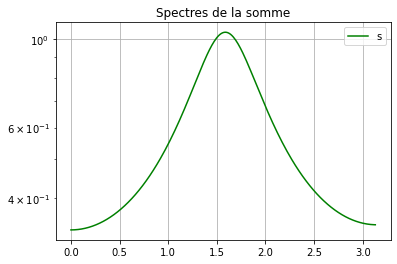

In [131]:
s=[]
for i in range(2):
  s.append(a[i]+b[i]+c[i])

f,mag=spectre([1]+s)
spectreS = mag[0]

plt.semilogy(
	f,mag[0],'-g',
)
plt.grid() 
plt.legend('spectre1')
plt.title("Spectres de la somme")
plt.show()


In [132]:
def autoRegression_OrdreN(m1,m2,nomserie,spectre2,ordre1,ordre2):
    D = np.cov([
	y[m1:m2] + [0, 0, 0, 0],
	[0] + y[m1:m2] + [0, 0, 0],
	[0, 0] + y[m1:m2] + [0, 0],
	[0, 0, 0] + y[m1:m2] + [0],
	[0, 0, 0, 0] + y[m1:m2]])

    E = - np.linalg.inv(D[0:ordre1, 0:ordre1]) @ D[0, 1:ordre1+1].reshape(ordre1, 1)  # ordre 
    H = - np.linalg.inv(D[0:ordre2, 0:ordre2]) @ D[0, 1:ordre2+1].reshape(ordre2, 1)  # ordre 
    E1 = np.append([1], E)  # vecteur de coefficients incluant a0(ordre 4)
    H1 = np.append([1], H)
    
    #tracé de la série entre 0 et m1
    plt.plot(t[m1:m2],y[m1:m2],label='Data = juxtapososition de 3 sous-series stationnaires')
    plt.title(nomserie)
    plt.show()
    # Tracé des spectres estimés
    f, mag = spectre(E1, H1)
    # Calcul des spectres des trois sous-series
    plt.semilogy(
    	f, mag[0],
    	f, mag[1],
    	':r',
        f,spectre2,':b',
        linewidth=4,
    )
    plt.title('Spectre / Calcul sur l intervalle [{} {}]'.format(m1,m2))
    plt.legend(['ordre'+str(ordre1), 'ordre'+str(ordre2),"vrai spectre"])
    return  plt.show()

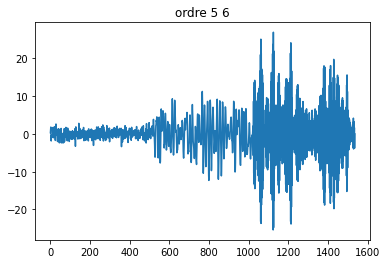

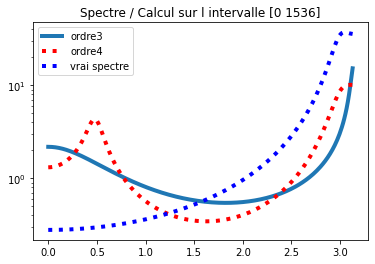

In [133]:
autoRegression_OrdreN(0,n,"ordre 5 6",spectre3,3,4)